In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
#Read two data sets
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_test_target = pd.read_csv("test_actual_price.csv")

In [27]:
# Data Exploration
# Count, mean, std, max, min, etc
print('Training Set Description:\n', df_train.SalePrice.describe())

Training Set Description:
 count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Skewness of data:  1.8828757597682129


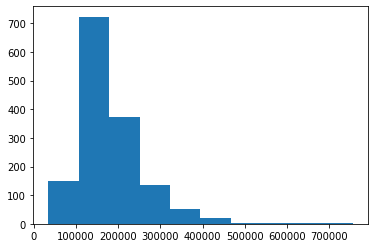

In [22]:
# Check for skewness or shape of the distribution of values
# Result - The distribution has longer tail on the right making it positive skewness
print('Skewness of data: ', df_train.SalePrice.skew())
plt.hist(df_train.SalePrice)
plt.show()

Skewness of data:  0.12133506220520406


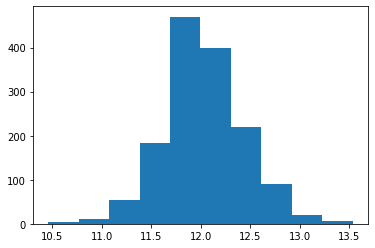

In [23]:
# Log-Transform target variable in order to improve linearity of the data. The predictions of the final model will be
# log-transformed as well
# A value closer to 0 means we have improved skewness and a normal distribution
target_var = np.log(df_train.SalePrice)
print('Skewness of data: ', target_var.skew())
plt.hist(target_var)
plt.show()

In [4]:
#generate train(df), trian_target(series), test(df), test_target(series) dataset
#only run once

df_test_target.sort_values("Id", inplace = True)
df_test_target = df_test_target.SalePrice 
df_train_target = df_train.SalePrice
df_train.drop(columns=["SalePrice"], inplace = True)
print ("train", df_train.shape, "test", df_test.shape)
print ("train_target", df_train_target.shape, "test", df_test_target.shape)


train (1460, 80) test (1459, 80)
train_target (1460,) test (1459,)


# Data pre-processing method 1 - Vaibhav Ashok

In [11]:
#Vaibhav Ashok's code 

def data_clean (df):
    #fill NA
    replace_nans_lotfrontage = df['LotFrontage'].fillna((df['LotFrontage'].mean()), inplace=True)
    replace_nans_MasVnrType = df['MasVnrType'].fillna('None', inplace=True)
    replace_nans_MasVnrArea = df['MasVnrArea'].fillna((df['MasVnrArea'].mean()), inplace=True)
    replace_nans_BsmtQual = df['BsmtQual'].fillna('NA', inplace=True)
    replace_nans_BsmtCond = df['BsmtCond'].fillna('NA', inplace=True)
    replace_nans_BsmtExposure = df['BsmtExposure'].fillna('NA', inplace=True)
    replace_nans_BsmtFinType1 = df['BsmtFinType1'].fillna('NA', inplace=True)
    replace_nans_BsmtFinType2 = df['BsmtFinType2'].fillna('NA', inplace=True)
    replace_nans_Electrical = df['Electrical'].fillna('NA', inplace=True)
    replace_nans_GarageType = df['GarageType'].fillna('NA', inplace=True)
    replace_nans_GarageFinish = df['GarageFinish'].fillna('NA', inplace=True)
    replace_nans_GarageQual = df['GarageQual'].fillna('NA', inplace=True)
    replace_nans_GarageCond = df['GarageCond'].fillna('NA', inplace=True)    
    
    replace_nans_BsmtFinSF1 = df['BsmtFinSF1'].fillna((df['BsmtFinSF1'].mean()), inplace=True)
    replace_nans_BsmtFinSF2 = df['BsmtFinSF2'].fillna((df['BsmtFinSF2'].mean()), inplace=True)
    replace_nans_BsmtUnfSF = df['BsmtUnfSF'].fillna((df['BsmtUnfSF'].mean()), inplace=True)
    replace_nans_TotalBsmtSF = df['TotalBsmtSF'].fillna((df['TotalBsmtSF'].mean()), inplace=True)
    replace_nans_BsmtFullBath = df['BsmtFullBath'].fillna((df['BsmtFullBath'].mean()), inplace=True)
    replace_nans_BsmtHalfBath = df['BsmtHalfBath'].fillna((df['BsmtHalfBath'].mean()), inplace=True)
    replace_nans_GarageCars = df['GarageCars'].fillna((df['GarageCars'].mean()), inplace=True)
    replace_nans_GarageArea = df['GarageArea'].fillna((df['GarageArea'].mean()), inplace=True)

    # Dropping columns with too many NaN values
    df.drop(columns=["Id",'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'GarageYrBlt'], inplace = True)

    #dummy viarable
    df = pd.get_dummies(df, columns=['MSZoning', 'Street', 'LotShape', 'LandContour',
                                      'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
                                      'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                                      'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                                      'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
                                      'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                      'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                                      'Electrical', 'KitchenQual', 'Functional', 'GarageType',
                                      'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
                                      'SaleType', 'SaleCondition'])
    return df

In [14]:
# data_clean(df_train)
print(df_train.head())

   MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0    AllPub    Inside       Gtl  ...          61             0         0   
1    AllPub       FR2       Gtl  ...           0             0         0   
2    AllPub    Inside       Gtl  ...          42             0         0   
3    AllPub    Corner       Gtl  ...          35           272         0   
4    AllPub       FR2       Gtl  ...          84             0         0   

  ScreenPorch PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  
0           

Train Dataset:


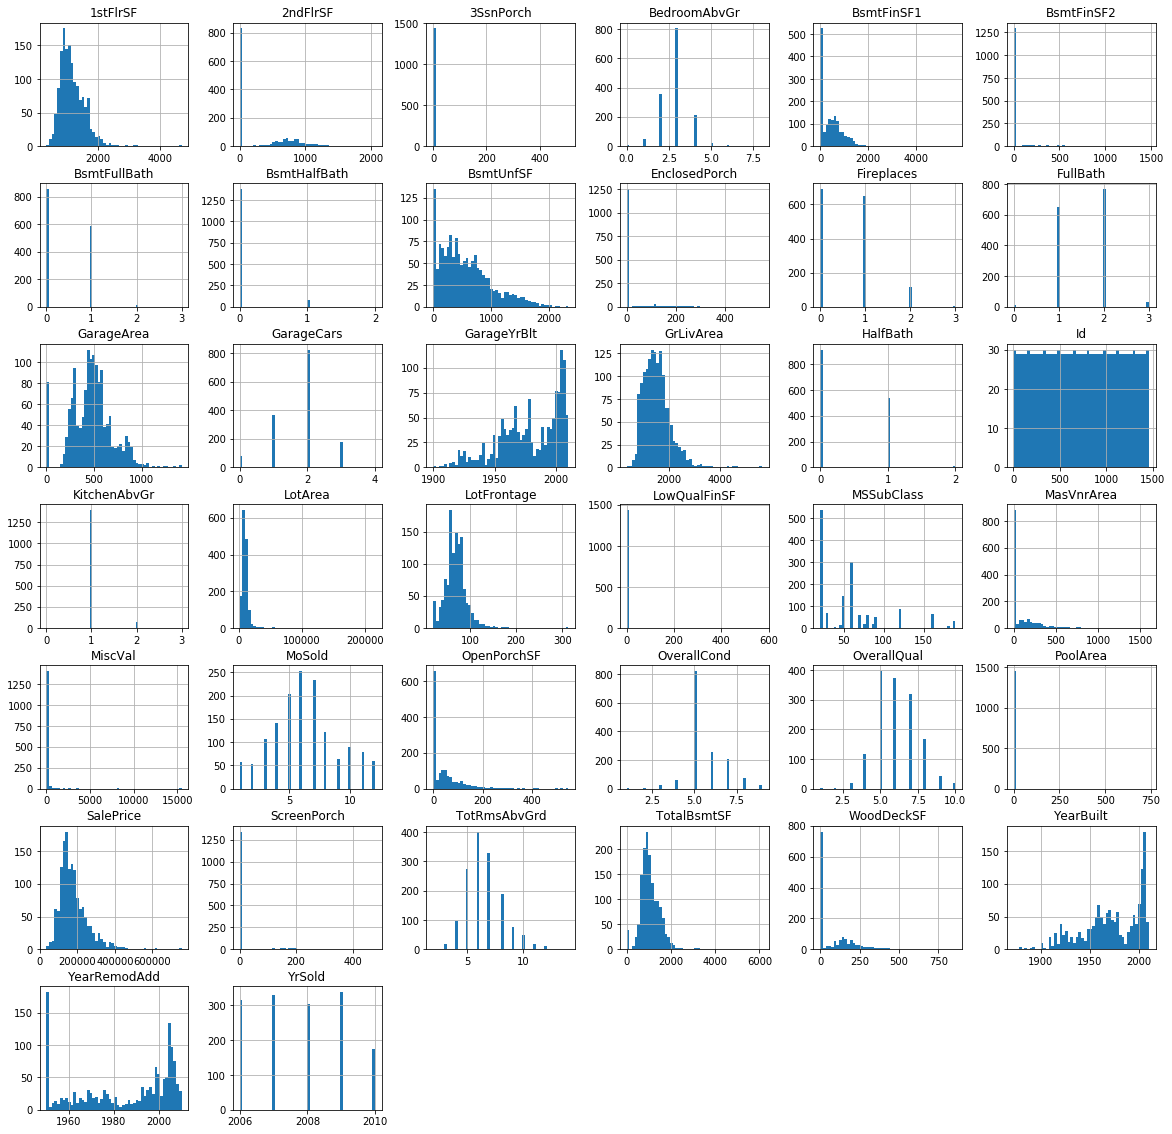

Test Dataset:


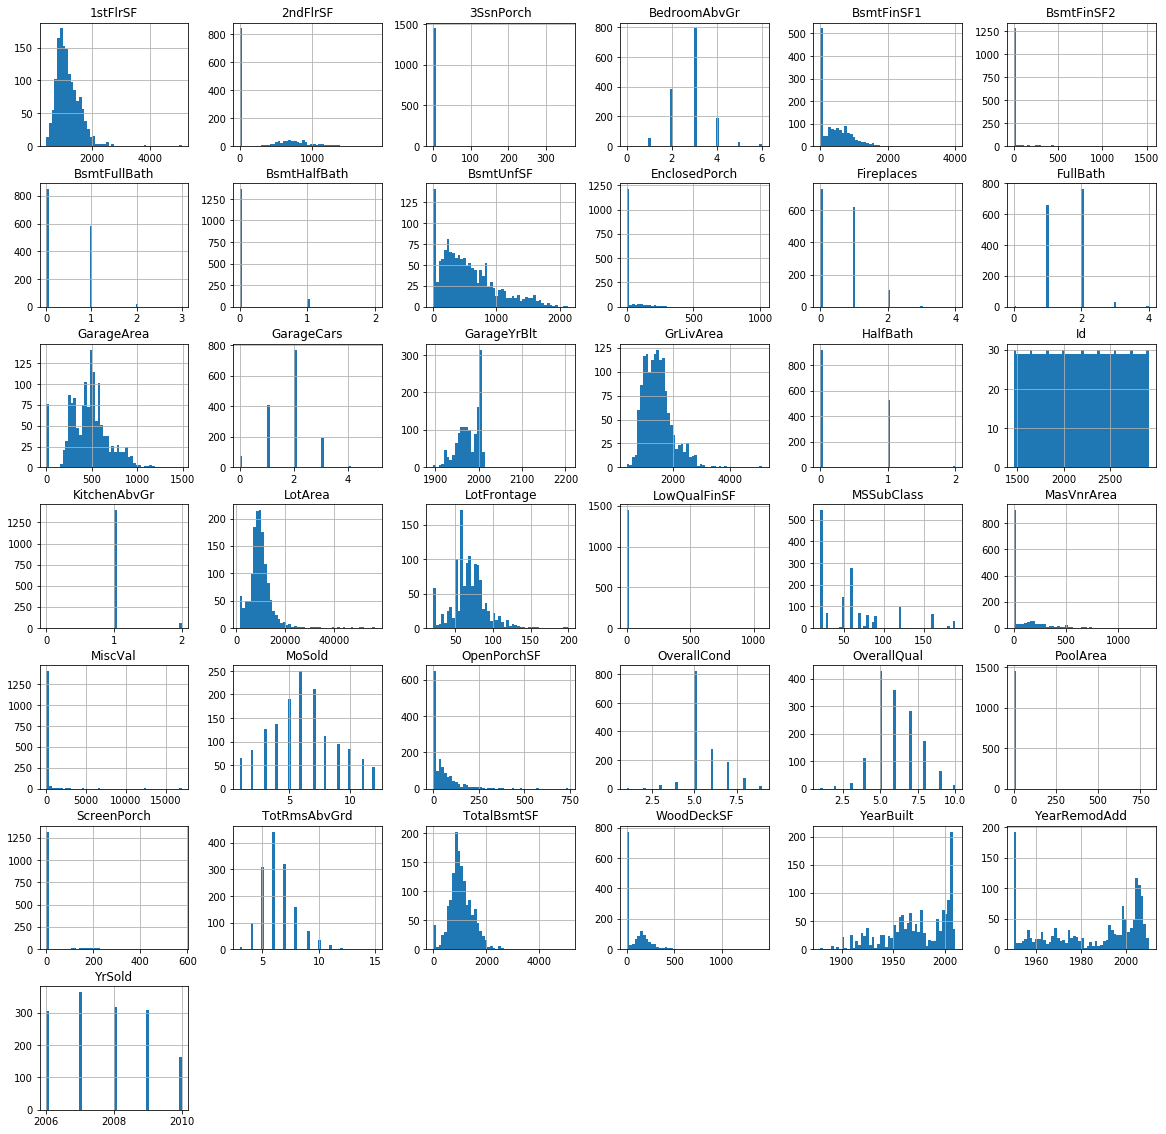

In [25]:
# Histogram
# Not all are normally distributed
print('Train Dataset:')
df_train.hist(bins=50, figsize=(20,20))
plt.show()
print('Test Dataset:')
df_test.hist(bins=50, figsize=(20,20))
plt.show()

In [16]:
def get_initial_heatmap(df):
    # Calculating correlation of initial data frame
    init_train_corr = df.corr(method='pearson')
    # print(init_train_corr)

    # Configure heat map of Pearson Correlation
    fig, ax = plt.subplots(figsize=(16, 16))
    ax.xaxis.tick_top()
    ax.set_xlabel('X LABEL')
    ax.xaxis.set_label_position('top')
    sns.heatmap(init_train_corr, xticklabels=True, yticklabels=True, vmin=0, vmax=1, ax=ax, linewidths=.5, cmap='YlGn')

    # Configure x and y ticks if needed
    plt.yticks(rotation=0, fontsize='8', va='center')
    plt.show()

Train Dataset


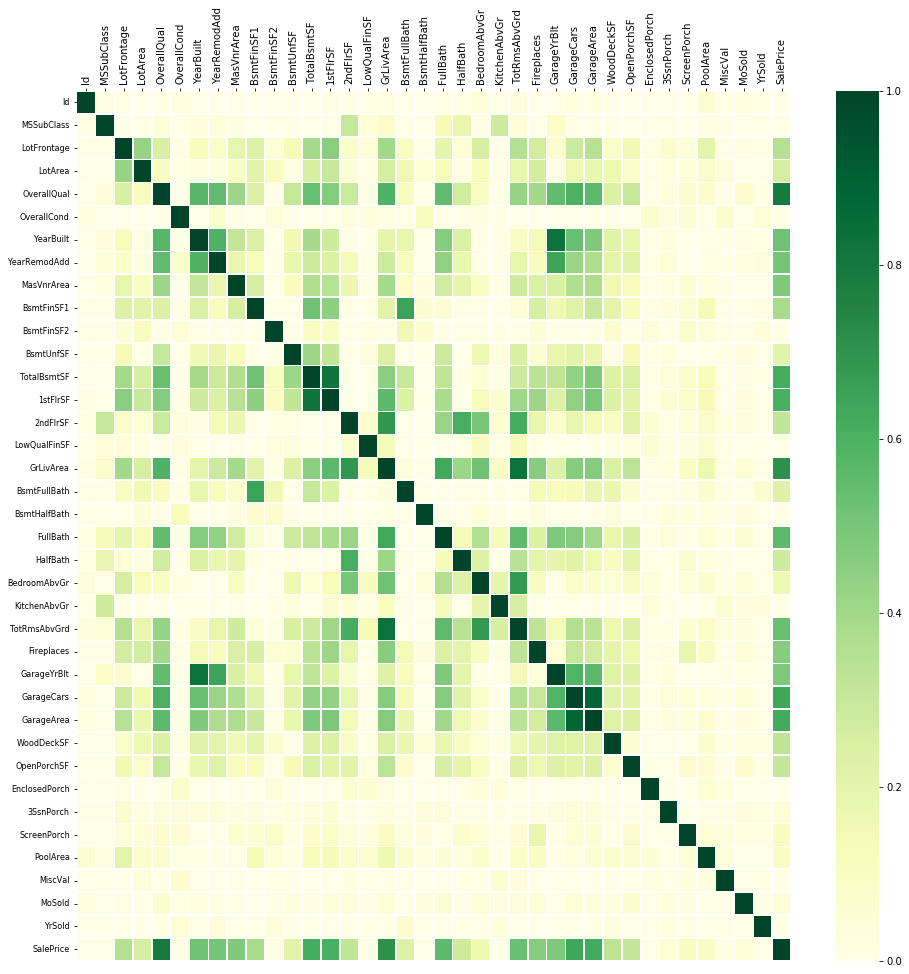

Test Dataset


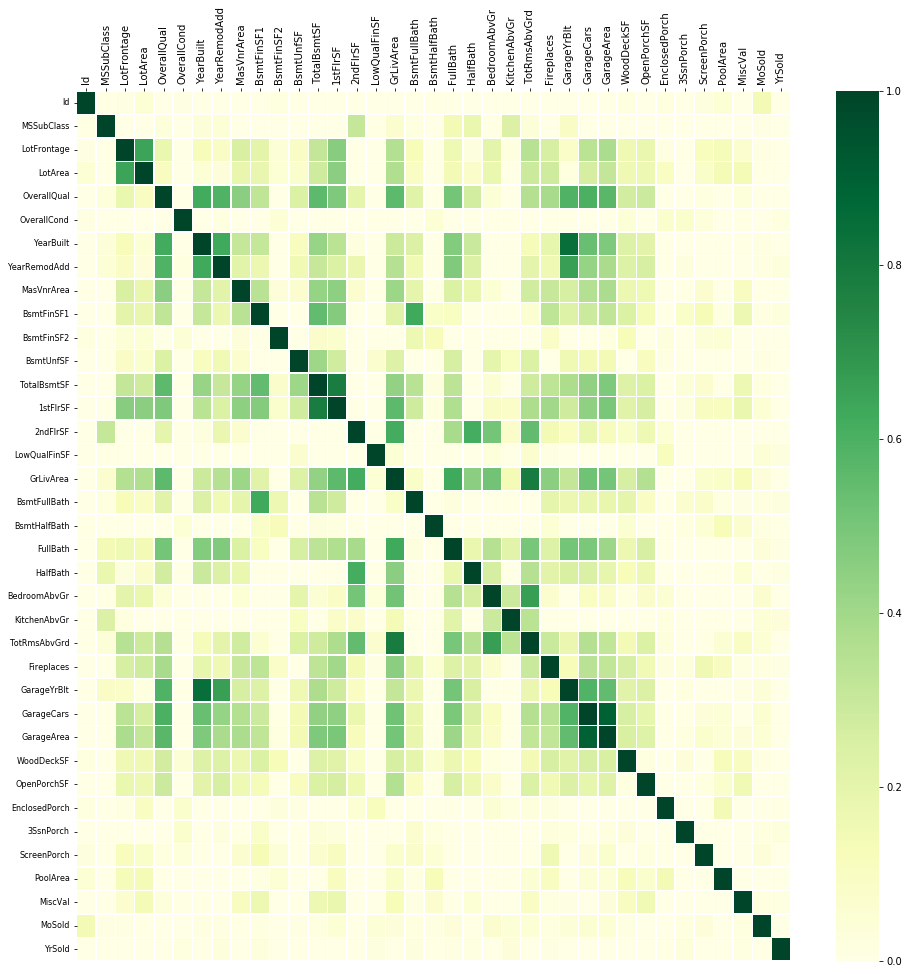

In [24]:
# Heatmap before data clean of numerical variables
print('Train Dataset')
get_initial_heatmap(df_train)
print('Test Dataset')
get_initial_heatmap(df_test)

In [28]:
# Feature selection done via the Filter Method
# Choose the appropriate features (columns) using Pearson Correlation Matrix
def get_corrs(df):
    # Calculating correlation of updated data frame 2 w/one-hot encoding <- correct in my opinion
    final_train_corr = df.corr(method='pearson')
    print('Here is the correlation matrix: ')

    return final_train_corr

In [29]:
# Correlation
# Train
get_corrs(df_train.head())

Here is the correlation matrix: 


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.405554,0.279347,0.807283,0.670820,-0.353553,-0.282975,-0.119475,0.330387,-0.485071,...,0.097596,0.409677,0.353553,NaN,NaN,NaN,NaN,0.608698,-0.176777,0.156140
MSSubClass,0.405554,1.000000,-0.576521,0.170688,0.725476,-0.975017,-0.178137,0.295568,0.369602,-0.852190,...,-0.826589,0.690018,0.458831,NaN,NaN,NaN,NaN,0.000000,0.028677,0.049133
LotFrontage,0.279347,-0.576521,1.000000,0.660922,0.138809,0.471873,0.485039,0.169348,0.433629,0.699699,...,0.877425,0.099057,-0.625506,NaN,NaN,NaN,NaN,0.711269,0.389569,0.595926
LotArea,0.807283,0.170688,0.660922,1.000000,0.727049,-0.252115,0.323452,0.357264,0.710525,-0.029929,...,0.311930,0.571539,-0.264449,NaN,NaN,NaN,NaN,0.942110,0.390507,0.686281
OverallQual,0.670820,0.725476,0.138809,0.727049,1.000000,-0.790569,0.226657,0.534310,0.839509,-0.405489,...,-0.268984,0.949993,0.000000,NaN,NaN,NaN,NaN,0.560449,0.395285,0.576290
OverallCond,-0.353553,-0.975017,0.471873,-0.252115,-0.790569,1.000000,-0.044797,-0.499851,-0.537020,0.734030,...,0.802453,-0.793952,-0.250000,NaN,NaN,NaN,NaN,-0.126592,-0.250000,-0.255400
YearBuilt,-0.282975,-0.178137,0.485039,0.323452,0.226657,-0.044797,1.000000,0.886424,0.707573,0.584094,...,0.150405,0.408430,-0.955671,NaN,NaN,NaN,NaN,0.536852,0.978070,0.900438
YearRemodAdd,-0.119475,0.295568,0.169348,0.357264,0.534310,-0.499851,0.886424,1.000000,0.838419,0.164326,...,-0.265522,0.701261,-0.711056,NaN,NaN,NaN,NaN,0.491959,0.960982,0.880600
MasVnrArea,0.330387,0.369602,0.433629,0.710525,0.839509,-0.537020,0.707573,0.838419,1.000000,0.094866,...,-0.026586,0.907380,-0.537020,NaN,NaN,NaN,NaN,0.692117,0.805530,0.907159
BsmtFinSF1,-0.485071,-0.852190,0.699699,-0.029929,-0.405489,0.734030,0.584094,0.164326,0.094866,1.000000,...,0.759367,-0.254491,-0.778492,NaN,NaN,NaN,NaN,0.145138,0.411478,0.358887


In [27]:
df_whole = df_train.append(df_test, ignore_index = True)
df_whole = data_clean(df_whole)
df_train_clean = df_whole.loc[:1459,]
df_test_clean  = df_whole.loc[1460:,]
print ("train", df_train_clean.shape, "test", df_test_clean.shape)

train (1460, 279) test (1459, 279)


# Linear Regression 

In [30]:
#import package
from sklearn.linear_model import LinearRegression

In [31]:
# train model
lin_reg = LinearRegression()
lin_reg.fit(df_train_clean, df_train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
#MAPE metric scoring
y_test_predict = lin_reg.predict(df_test_clean)
pd.Series(y_test_predict)
MAPE = sum(abs(np.array(df_test_target)-y_test_predict)/np.array(df_test_target))/df_test_target.shape[0]
MAPE

0.1075765286292835

# Ridge Regression Training - Jian Wang's Training 

In [35]:
#import package
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [36]:
# tuning paramenter by using grid_search package
param_grid = [{"alpha": range(1,100)}]
Ridge_reg = Ridge()
grid_search = GridSearchCV(Ridge_reg, param_grid, cv=10, scoring='neg_mean_absolute_error',return_train_score=True) 
grid_search.fit(df_train_clean, df_train_target)
grid_search.best_params_

{'alpha': 31}

In [37]:
# train model
Ridge_reg = Ridge(alpha=31)
Ridge_reg.fit(df_train_clean, df_train_target)

Ridge(alpha=31, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

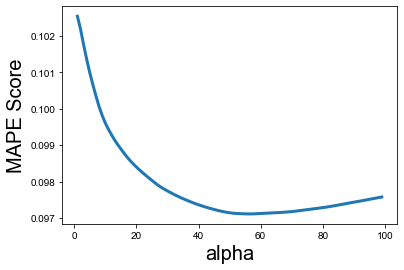

In [38]:
#visualization

Ridge_reg = Ridge()
Ridge_dic = {}
for alpha in range(1,100):
    Ridge_reg = Ridge(alpha=alpha)
    Ridge_reg.fit(df_train_clean, df_train_target)
    y_test_predict = Ridge_reg.predict(df_test_clean)
    pd.Series(y_test_predict)
    MAPE = sum(abs(np.array(df_test_target)-y_test_predict)/np.array(df_test_target))/df_test_target.shape[0]
    Ridge_dic[alpha] = MAPE

ax = sns.lineplot(list(Ridge_dic.keys()), list(Ridge_dic.values()), lw = 3)
ax.set_xlabel("alpha",fontsize=20)
ax.set_ylabel("MAPE Score",fontsize=20)
sns.set_style("darkgrid")

# Random forest regressor training 

In [44]:
#import package
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_val, y_train, y_val = train_test_split (df_train_clean, df_train_target, train_size = .85, random_state = 99)

In [40]:
forest_reg = RandomForestRegressor()
forest_reg.fit(df_train_clean, df_train_target)

C:\Users\leech\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [41]:
#MAPE metric scoring
y_test_predict = forest_reg.predict(df_test_clean)
MAPE = sum(abs(np.array(df_test_target)-y_test_predict)/np.array(df_test_target))/df_test_target.shape[0]
MAPE

0.11113869317440962

In [42]:
#cross validation tuning parameters
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_absolute_error',return_train_score=True) 
grid_search.fit(df_train_clean, df_train_target)
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [46]:
#MAPE metric scoring
grid_search.best_estimator_.fit(x_train, y_train)
y_test_predict = grid_search.best_estimator_.predict(df_test_clean)
MAPE = sum(abs(np.array(df_test_target)-y_test_predict)/np.array(df_test_target))/df_test_target.shape[0]
MAPE

0.12133380786508173

# Data cleaning method 2 - Sara Abdulla 

In [47]:
import pandas as pd 
import numpy as np
import sklearn
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_target = pd.read_csv('test_actual_price.csv') #.SalePrice
test = test.merge(test_target, on = 'Id')
train.drop('Id', axis = 'columns', inplace = True)
test.drop('Id', axis = 'columns', inplace = True)

In [48]:
dic_dict = {'NA':0, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 
    'Po':1, 'Fin':3, 'RFn':2, 'Unf':1, 'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 
    'Sev':2, 'Sal':1, 'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'Gtl':1, 'Mod':2, 
            'Sev':3}
train = train.replace(dic_dict)
test = test.replace(dic_dict)
#Ordinal variables have become numeric. 

In [49]:
len(train) #1460
len(test) #1459
df_whole = train.append(test, ignore_index = True)
df_whole = pd.get_dummies(df_whole)
train = df_whole.loc[:1459,]
test  = df_whole.loc[1460:,]

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#train = train.fillna(train.mode().iloc[0]) 
#test = test.fillna(test.mode().iloc[0])
#Tested using mean, median, mode, 0
train = train.fillna(0) 
test = test.fillna(0)
test_target = test.SalePrice
train_target = train.SalePrice
test.drop('SalePrice', axis = 1, inplace = True)
train.drop('SalePrice', axis = 1, inplace = True)

In [51]:
#K-best test - feature selection method 1 

bestfeatures = SelectKBest(score_func=chi2, k=35)
fit = bestfeatures.fit(train, train_target)
#Make sure you get rid of NaN
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feat','Score']  #naming the dataframe columns

ind = featureScores.nlargest(35,'Score').index

In [52]:
train_top = train.iloc[:,ind]
test_top = test.iloc[:, ind]

In [55]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(train_top, train_target)
y_val_predict = lin_reg.predict(test_top)
MAPE = np.sum(np.abs(np.array(test_target)-y_val_predict)/np.array(test_target))/np.array(test_target).size
MAPE

0.15590678024016688

In [57]:
#If we choose to use all the variables instead of selecting using KBest, this is the outcome (more accurate)

from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(train, train_target)
y_val_predict = lin_reg.predict(test)
MAPE = np.sum(np.abs(np.array(test_target)-y_val_predict)/np.array(test_target))/np.array(test_target).size
MAPE

0.10940930812186572

In [66]:
#Random forest is more accurate 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

forest_reg = RandomForestRegressor()
forest_reg.fit(train, train_target)
#MAPE metric scoring
y_val_predict = forest_reg.predict(test)
MAPE = np.sum(np.abs(np.array(test_target)-y_val_predict)/np.array(test_target))/np.array(test_target).size
MAPE

C:\Users\leech\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.10105840410420161